# 直方图相关：

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 


(256, 256)
119


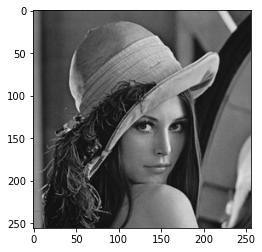

In [2]:
img = plt.imread("..//pic/LENA.bmp", format = "gray")[:,:,0]
print(img.shape)
print(img[50,50])
plt.imshow(img, cmap="gray")

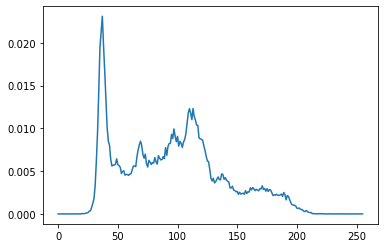

In [3]:
histo = np.zeros([256])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histo[img[i,j]] += 1
histo /= img.shape[0] * img.shape[1]
plt.plot(histo)

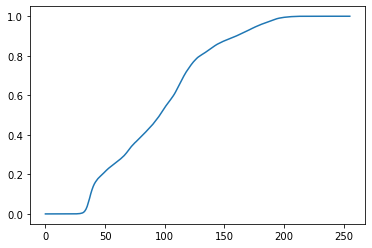

In [4]:
pdf = np.zeros([256])
for i in range(256):
    for j in range(i):
        pdf[i] += histo[j]
plt.plot(pdf)

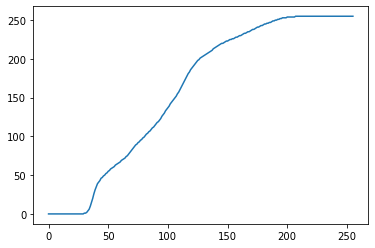

In [8]:
eq = np.zeros(256)
for i in range(256):
    eq[i] = int(np.around(pdf[i] * 255))
plt.plot(eq)

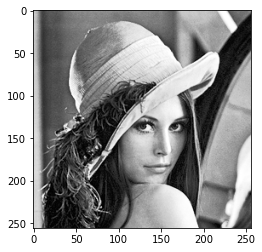

In [15]:
eqimg = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        eqimg[i,j] = eq[img[i,j]]
plt.imshow(eqimg, cmap = "gray")